In [1]:
# %pip install requests
# %pip install bs4
# %pip install lxml
# %pip install HTMLParser
# %pip install xmltodict
# %pip install nltk 
# %pip install nlu

In [2]:
from bs4 import BeautifulSoup, Tag, NavigableString
import requests
import xmltodict

import pandas as pd
import numpy as np
import re
import string

import nltk

# Problem 1

[LO2] [15%] Mengumpulkan data teks berita dengan menggunakan metode web scrapping minimal 
total 100 data teks berita yang berasal dari media digital seperti liputan 6, detik.com dan lain-lain dengan 
kategori berita politik, olahraga, bisnis dan hiburan. Data ini harus berasal minimal dari 3 media yang 
berbeda dan anda juga perlu melakukan pelabelan.

In [3]:
# News Labeling
labels = ['politik', 'olahraga', "hiburan", 'bisnis']

list1 = ["politik", "hukum", "nasional", "internasional"]
list2 = ["olahraga", "bola", "piala dunia", "sport"]
list3 = ["gaya hidup", "kesehatan", "hiburan",]
list4 = ["bisnis",]
list0 = [list1, list2, list3,list4]

label_dict = {}

for x, v in zip(list0, labels): label_dict.update({k:v for k in x})
skip_content = ["foto", "video", "doa", "niat", "jadwal","puasa","tata cara"]

label_dict

{'politik': 'politik',
 'hukum': 'politik',
 'nasional': 'politik',
 'internasional': 'politik',
 'olahraga': 'olahraga',
 'bola': 'olahraga',
 'piala dunia': 'olahraga',
 'sport': 'olahraga',
 'gaya hidup': 'hiburan',
 'kesehatan': 'hiburan',
 'hiburan': 'hiburan',
 'bisnis': 'bisnis'}

## Working on CNN

### URL Generation

URL Generation: Crawling

The method I am using to generate URLs of CNN News Website is by "crawling" the news index page of general/uncategorized news, page by page, then fetch & append each non-duplicated hyperlink to the list.

In [4]:
n_crawl = 200

In [5]:
################################### Crawl - Master ##################################################
page = 1
stop = False

url_cnn = "https://www.cnnindonesia.com/indeks/2/"

pages_cnn = [url_cnn+str(1)]
news_cnn = []

for url in pages_cnn:
    if len(news_cnn) > n_crawl:
            stop = True
            break

    print("page:", page, "||| news_count:", len(news_cnn))
    src = requests.get(url).content
    soup = BeautifulSoup(src, "html.parser")

    for ele in soup.select("div.flex.flex-col.gap-5")[0].find_all('article'):
        link = ele.a.get('href')
        if link in news_cnn:
                # print("duplicate:",link)
                continue
        
        news_cnn.append(link)
    
    page+=1
    if not stop:
        pages_cnn.append(url_cnn+str(page))

page: 1 ||| news_count: 0
page: 2 ||| news_count: 10
page: 3 ||| news_count: 19
page: 4 ||| news_count: 29
page: 5 ||| news_count: 37
page: 6 ||| news_count: 47
page: 7 ||| news_count: 57
page: 8 ||| news_count: 67
page: 9 ||| news_count: 76
page: 10 ||| news_count: 86
page: 11 ||| news_count: 91
page: 12 ||| news_count: 101
page: 13 ||| news_count: 108
page: 14 ||| news_count: 118
page: 15 ||| news_count: 128
page: 16 ||| news_count: 138
page: 17 ||| news_count: 148
page: 18 ||| news_count: 158
page: 19 ||| news_count: 168
page: 20 ||| news_count: 178
page: 21 ||| news_count: 188
page: 22 ||| news_count: 198


### Scraping

In [ ]:
################################### Scrape - Master #########################################
title_cnn = []
content_cnn = []
label_cnn = []
subcat_cnn = []

n_news = 100

idx = 0 #debug

for url in news_cnn:
    if idx > n_news:
        break

    # Request Handling
    req = requests.get(url, allow_redirects=False)
    if req.status_code != 200: # prevents redirects to webpage with different format
        continue

    # bs4
    soup = BeautifulSoup(req.content, "html.parser")

    title, content, label, subcat = ("","","","")

    # news headline
    title = soup.title.string

    # news content
    text = []

    for ele in soup.find_all('p'):
        if not ele.get("class") and ele.string is not None:
            text.append(ele.string)

    content = "".join(text)

    # news tag
    tags = []

    for ele in soup.select("div.breadcrumb.flex")[0].find_all('a'):
        tags.append(ele.string)

    label = tags[1]
    subcat = tags[-1]

    if any(s in title.lower() for s in skip_content) or content is None:
        continue

    if label_dict.get(label.lower()) is None or label_dict.get(label.lower()) == "hiburan":
        continue
    
    # insert data
    idx+1
    title_cnn.append(title)
    content_cnn.append(content)
    label_cnn.append(label_dict.get(label.lower()))
    subcat_cnn.append(subcat)

### Scraped Data

In [ ]:
data_cnn = pd.DataFrame({"title":title_cnn, "content":content_cnn, "label":label_cnn,"sublabel":subcat_cnn, "media":"CNN"})
data_cnn

,title,content,label,sublabel,media
0,2 Anak Buah SYL Bertemu Ahmad Ali NasDem saat ...,Hal itu terungkap dalam sidang lanjutan kasus ...,politik,Hukum Kriminal,CNN
1,Surya Paloh Buka Suara soal Waketum NasDem Dat...,Paloh mengaku tak mempermasalahkan pertemuan t...,politik,Politik,CNN
2,PKB Belum Bahas Oposisi atau Koalisi saat Diku...,"""Belum sampai di sana [oposisi atau koalisi]. ...",politik,Politik,CNN
3,Korea Selatan vs Indonesia U-23: Menguji Premi...,Ketika itu Indonesia dibantai 4-0 dalam Kualif...,olahraga,Sepakbola,CNN
4,Prabowo dan Gibran Tiba di Istana untuk Temui ...,"Sebelumnya, pantauan dari rumah dinas Menteri ...",politik,Politik,CNN
...,...,...,...,...,...
99,Daftar Keberingasan Batalion Netzah Yehuda Israel,"Menteri Luar Negeri AS, Antony Blinken, menyeb...",politik,Timur Tengah,CNN
100,"STY vs Hwang Sun Hong, Rival Lama Bentrok di P...",Timnas Indonesia U-23 akan menghadapi Korea Se...,olahraga,Sepakbola,CNN
101,Syarat Timnas Indonesia U-23 Lolos ke Olimpiad...,Timnas Indonesia U-23 saat ini menjejakkan kak...,olahraga,Sepakbola,CNN
102,Alasan AS Mau Sanksi Batalion Netzah Yehuda Is...,Menteri Luar Negeri AS Antony Blinken mengisya...,politik,Timur Tengah,CNN


In [ ]:
data_cnn['label'].value_counts()

label
politik     89
olahraga    32
Name: count, dtype: int64

## Working on Tirto

### URL Generation

URL Generation: Sitemap of General News Index

In [ ]:
n_url = 100

In [ ]:
################################## Sitemap - Master ##############################
url_tirto = "https://tirto.id/s/sitemap-content.xml"
req = requests.get(url_tirto)

sitemap = xmltodict.parse(req.text)

news_tirto = [url["loc"] for url in sitemap['urlset']["url"]]
len(news_tirto)

317

In [ ]:
title_tirto = []
content_tirto = []
label_tirto = []
# subcat_tirto = []

idx = 0

for url in news_tirto:
    if idx > n_url:
        break
    if "jadwal" in url.lower():
        continue
    
    req = requests.get(url, allow_redirects=False)
    if req.status_code != 200:
        continue

    soup = BeautifulSoup(req.content, "html.parser")

    title, content, label = ("","","")

    # title
    title = soup.title.string

    # content
    text = []

    for ele in soup.select("div.article-body")[0].find_all('p'):
        if ele.get_text() is not None:
            text.append(ele.get_text())

    content = "".join(text)

    # tag

    # some Tirto news doesnt have news tag.
    try:
        soup.select("div.content-text-editor")[-1].find(style=re.compile("font-size:")).div.contents[-1]
    except:
        label = "None"
    else:
        label = soup.select("div.content-text-editor")[-1].find(style=re.compile("font-size:")).div.contents[-1].replace("-", "").strip()
    
    if label_dict.get(label.lower()) is None:
        continue

    # if any(s in title.lower() for s in skip_content) or content is None:
    #     continue

    title_tirto.append(title)
    content_tirto.append(content)
    label_tirto.append(label_dict.get(label.lower()))
    idx=idx+1

    if idx%10 == 0: print("news_count:", idx)


news_count: 10
news_count: 20
news_count: 30
news_count: 40


### Scraped Data

TODOS:
1. remove 'tirto.id - ' in content
2. remove extra '\n' in content

In [ ]:
data_tirto = pd.DataFrame({"title":title_tirto, "content":content_tirto, "label":label_tirto, "media":"Tirto.ID"})
data_tirto

,title,content,label,media
0,Luno Umumkan Pergantian Pemimpin di Wilayah As...,tirto.id - Luno baru saja melakukan pergantian...,bisnis,Tirto.ID
1,Valencia vs Villarreal Liga Spanyol 2023: Pred...,tirto.id - Prediksi Valencia vs Villarreal dal...,olahraga,Tirto.ID
2,Menpora Pastikan Indonesia Kirim Atlet Tenis M...,tirto.id - Menteri Pemuda dan Olahraga (Menpor...,olahraga,Tirto.ID
3,Prabowo Minta Wiranto Menemani Dirinya bila ja...,tirto.id - Ketua Umum Partai Gerindra Prabowo ...,politik,Tirto.ID
4,Gerindra Istimewakan Jimly & Marzuki Alie mesk...,tirto.id - Mantan Ketua Mahkamah Konstitusi Ji...,politik,Tirto.ID
5,Alasan Kenapa Harus Tidur Cukup dan 11 Manfaat...,tirto.id - Tidur yang cukup merupakan kebutuha...,hiburan,Tirto.ID
6,KPK Usut Asal-usul Harta Kekayaan AKBP Achirud...,tirto.id - Komisi Pemberantasan Korupsi (KPK) ...,politik,Tirto.ID
7,3 Penyakit yang Diakibatkan Kekurangan Protein...,tirto.id - Protein adalah nutrisi penting yang...,hiburan,Tirto.ID
8,Wiranto Dukung Prabowo jadi Capres di Pilpres ...,tirto.id - Mantan Ketua Umum Partai Hanura Wir...,politik,Tirto.ID
9,BRIN Tetap Proses Sidang Disiplin Andi Pangera...,tirto.id - Kepala Badan Riset dan Inovasi Nasi...,politik,Tirto.ID


In [ ]:
data_tirto.loc[:, 'label'].value_counts()

label
politik     20
hiburan     14
olahraga    11
bisnis       4
Name: count, dtype: int64

## Working on Tempo

### URL Generation

URL Generation: Sitemaps of Categorized-News Index

In [ ]:
n_link = (15,15,30)
category = ["hiburan","hiburan", 'bisnis']

In [ ]:
################################# Sitemap - Master #####################################

urls_tempo = [
    "https://gaya.tempo.co/sitemap-posts-1.xml",
    "https://travel.tempo.co/sitemap-posts-1.xml",
    "https://bisnis.tempo.co/sitemap-posts-1.xml",
]

news_tempo = []

for url, n in zip(urls_tempo, n_link):
    req = requests.get(url)
    sitemap = xmltodict.parse(req.text)
    urlset = sitemap['urlset'].get('url')
    
    # [news_tirto.append(news['loc']) for news in sitemap['urlset'].get('url') if sitemap['urlset'].get('url') is not None]
    if urlset is not None: # handling empty urlset in Tempo sitemap
        [news_tempo.append(url.get('loc')) for url in urlset[:n]]

In [ ]:
#################################### Scrape - Master #################################
content_tempo = []
title_tempo = []
idx = 0

for news in news_tempo:
    req = requests.get(news)
    if req.status_code != 200:
        continue
    
    soup = BeautifulSoup(req.content, 'html.parser')
    
    # title
    title = soup.title.string


    # content
    text = []
    for parent in soup.select('div.detail-konten')[0].find_all('p'):
        for child in parent.children:
            if child.string is not None:
                text.append(child.string)
            # print(child.string)

    content = "".join(text)

    if any(s in title.lower() for s in skip_content) or content is None:
        continue

    title_tempo.append(title)
    content_tempo.append(content)
    idx+=1
    # print(soup.title.string)


In [ ]:
# tag
label_tempo = []

for n,cat in zip(n_link,category):
    [label_tempo.append(x) for x in ([cat]*n)]

### Scraped Data

In [ ]:
data_tempo = pd.DataFrame({"title":title_tempo, "content":content_tempo, "label":label_tempo, "media":"Tempo"})
data_tempo.head()

,title,content,label,media
0,10 Tips Bagi Para Pemula yang Ingin Bersepeda ...,"TEMPO.CO, Jakarta - Bagi banyak orang yang bar...",hiburan,Tempo
1,10 Kebiasaan yang Bisa Menurunkan Fungsi Otak ...,"TEMPO.CO, Jakarta - Otak adalah organ yang men...",hiburan,Tempo
2,Saran Tenaga Medis agar Kebersihan Tangan Sela...,"TEMPO.CO, Jakarta - Perawat di Rumah Sakit Pus...",hiburan,Tempo
3,"Saling Mempengaruhi, Ini Hubungan Diabetes den...","TEMPO.CO, Jakarta - Gangguan tidur menjadi sal...",hiburan,Tempo
4,Kelola Stres Setiap Hari untuk Redakan Emosi -...,"TEMPO.CO, Jakarta - Psikolog klinis Nirmala Ik...",hiburan,Tempo


# Problem 2

[LO2] [10%] Melakukan text preprocessing seperti cleansing, tokenization, filtering dan anda dapat 
menambahkan stemming atau lemmatization jika diperlukan. Sediakan hasil cleansing dalam 1 kolom 
terpisah.

## Preprocessing

In [213]:
# concatination
data = pd.concat([data_cnn.drop('sublabel', axis=1), data_tirto, data_tempo], axis=0).copy()
data = data.sample(frac=1).reset_index(drop=True)

# balancing labels (y) count
n_cat = 50
def cat_minimizer(df, cat, n = n_cat):
    df.loc[df['label'] == cat] = df.loc[df['label'] == cat][:n]

for label in labels:
    cat_minimizer(data, label)

# further debugging. subsetting messed up the data somehow
data = data[data['content'].notna()]
data['content']=data['content'].astype("str")

data.to_csv('1a. scraped_raw.csv', index=False)

data

,title,content,label,media
0,"Prediksi Barcelona vs Osasuna LaLiga 2023, H2H...",tirto.id - Prediksi Barcelona vs Osasuna di la...,olahraga,Tirto.ID
1,Anies Usai Penetapan Prabowo-Gibran: Catatan d...,Hal itu ia sampaikan usai menghadiri penetapan...,politik,CNN
2,Pentingnya Ibu Pahami Jenis Bahasa Kasih Sayan...,"TEMPO.CO, Jakarta - Dokter praktisi neuroparen...",hiburan,Tempo
3,"Di Sidang, Saksi Ungkap Ulang Tahun Cucu SYL D...",Salah satunya adalah membayar bon dari acara u...,politik,CNN
4,"Phuket dan Pattaya Overtourism, Pelaku Usaha P...","TEMPO.CO, Jakarta - Destinasi wisata populer T...",hiburan,Tempo
...,...,...,...,...
205,Bandara Changi di Singapura Dinilai Terbaik un...,"TEMPO.CO, Jakarta - Gelar bandara terbaik bole...",hiburan,Tempo
208,Unilever Tarik Es Krim Magnum di Inggris dan I...,"TEMPO.CO, Jakarta - Badan Pengawas Obat dan Ma...",bisnis,Tempo
210,"Saling Mempengaruhi, Ini Hubungan Diabetes den...","TEMPO.CO, Jakarta - Gangguan tidur menjadi sal...",hiburan,Tempo
211,"Apa Itu Resistensi Insulin, 12 Penyebab dan 4 ...",tirto.id - Resistensi insulin adalah kondisi ...,hiburan,Tirto.ID


In [176]:
data['label'].value_counts()

label
politik     50
hiburan     44
olahraga    41
bisnis      34
Name: count, dtype: int64

## Checkpoint 1

In [27]:
# load checkpoint

data = pd.read_csv('./1a. scraped_raw.csv', sep=',')
data['content']=data['content'].astype("str")
data.head()

,title,content,label,media
0,"Prediksi Barcelona vs Osasuna LaLiga 2023, H2H...",tirto.id - Prediksi Barcelona vs Osasuna di la...,olahraga,Tirto.ID
1,Anies Usai Penetapan Prabowo-Gibran: Catatan d...,Hal itu ia sampaikan usai menghadiri penetapan...,politik,CNN
2,Pentingnya Ibu Pahami Jenis Bahasa Kasih Sayan...,"TEMPO.CO, Jakarta - Dokter praktisi neuroparen...",hiburan,Tempo
3,"Di Sidang, Saksi Ungkap Ulang Tahun Cucu SYL D...",Salah satunya adalah membayar bon dari acara u...,politik,CNN
4,"Phuket dan Pattaya Overtourism, Pelaku Usaha P...","TEMPO.CO, Jakarta - Destinasi wisata populer T...",hiburan,Tempo


## Text Cleaning

In [28]:
# Removing news media tagging
pattern = r"TEMPO\.CO,.{1,10}-"
data.loc[:,'content']=data['content'].map(lambda text: re.sub(pattern, '',text))

pattern = r"tirto\.id.{1,10}-"
data.loc[:,'content'] = data['content'].map(lambda text: re.sub(pattern, "", text))

pattern = r"tempo"
data.loc[:,'content'] = data['content'].map(lambda text: re.sub(pattern, "", text))

pattern = r"CNN"
data.loc[:,'content'] = data['content'].map(lambda text: re.sub(pattern, "", text))

pattern = r"\[.{1,10}\]" # remove something like: [CNN], [Malam, ...]
data.loc[:,'content'] = data['content'].map(lambda text: re.sub(pattern, " ", text))

# Correcting spacing
pattern = r'\.(?=[\w"])'
data.loc[:,'content'] = data['content'].map(lambda text: re.sub(pattern, ". ", text))
# "paragraph 1.Paragraph 2." -> "paragraph 1. Paragraph 2."

# Text Folding, Removing trailing-whitespace, Non-Word
pattern = r"[^a-zA-Z\s]" # removing numbers and punctuations
data['content'] = data['content'].map(lambda text: re.sub(pattern," ", text))

pattern = r"\\xa0"
data.loc[:,'content'] = data['content'].map(lambda text: re.sub(pattern, "", text))

pattern = r'\s{2,}'
data.loc[:,'content'] = data['content'].map(lambda text: re.sub(pattern, " ", text))

data['content'] = data['content'].map(lambda text: text.strip().lower())

data.reset_index(drop=True, inplace=True)

## Tokenization

In [216]:
import nltk
nltk.download('punkt')

data['token'] = data.loc[:,'content'].map(lambda x: nltk.tokenize.word_tokenize(x))
data['token']

0      [prediksi, barcelona, vs, osasuna, di, laga, a...
1      [hal, itu, ia, sampaikan, usai, menghadiri, pe...
2      [dokter, praktisi, neuroparenting, aisah, dahl...
3      [salah, satunya, adalah, membayar, bon, dari, ...
4      [destinasi, wisata, populer, thailand, phuket,...
                             ...                        
164    [gelar, bandara, terbaik, boleh, direbut, band...
165    [badan, pengawas, obat, dan, makanan, bpom, an...
166    [gangguan, tidur, menjadi, salah, satu, tantan...
167    [resistensi, insulin, adalah, kondisi, komplek...
168    [psikolog, klinis, nirmala, ika, kusumaningrum...
Name: token, Length: 169, dtype: object

## Filtering Stopwords

In [217]:
from nltk.corpus import stopwords
# nltk.download('stopwords')

stopwords = set(stopwords.words('indonesian'))

data['token'] = data['token'].map(lambda x: [word for word in x if word not in stopwords])

## Stemming

In [218]:
# %pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

data['token']= data['token'].apply(lambda tokens: [stemmer.stem(token) for token in tokens])

## Final

In [219]:
data['clean_text'] = data['token'].map(lambda x: " ".join(x))

data_prc = data.iloc[:,[1,5,3,2]].copy()
data_prc.rename(columns={'content':'text'}, inplace=True)
data_prc.to_csv('1b. scraped_cleaned.csv', index=False)

data_prc

,text,clean_text,media,label
0,prediksi barcelona vs osasuna di laga awal pek...,prediksi barcelona vs osasuna laga pekan lalig...,Tirto.ID,olahraga
1,hal itu ia sampaikan usai menghadiri penetapan...,hadir tetap prabowo subianto gibran rakabuming...,CNN,politik
2,dokter praktisi neuroparenting aisah dahlan me...,dokter praktisi neuroparenting aisah dahlan ce...,Tempo,hiburan
3,salah satunya adalah membayar bon dari acara u...,salah satu bayar bon acara ulang cucu syl anak...,CNN,politik
4,destinasi wisata populer thailand phuket dan ...,destinasi wisata populer thailand phuket patta...,Tempo,hiburan
...,...,...,...,...
164,gelar bandara terbaik boleh direbut bandara ha...,gelar bandara baik rebut bandara hamad doha ba...,Tempo,hiburan
165,badan pengawas obat dan makanan bpom angkat ...,badan awas obat makan bpom angkat bicara aman ...,Tempo,bisnis
166,gangguan tidur menjadi salah satu tantangan se...,ganggu tidur salah tantang serius derita diabe...,Tempo,hiburan
167,resistensi insulin adalah kondisi kompleks ket...,resistensi insulin kondisi kompleks tubuh resp...,Tirto.ID,hiburan


# Problem 3

[LO1,LO2] [20%] Melakukan text representation dengan menggunakan 2 metode, metode pertama adalah 
metode yang memberikan informasi seberapa penting sebuah kata dalam suatu sample data atau dokumen 
yang berada dalam kumpulan dataset. Metode kedua adalah metode representasi kata ke dalam suatu set 
vektor yang menggambarkan penggunaannya dalam konteks, size vektor adalah 50, dan frequency kata 
yang diperhitungkan minimal 3. Vektor yang dihasilkan harus berdasarkan hasil training dengan input kata 
dan target output konteks. Jelaskan langkah-langkah yang anda lakukan.

## Checkpoint 2

In [6]:
data_prc = pd.read_csv('1b. scraped_cleaned.csv', sep=',')
data_prc['clean_text']=data_prc['clean_text'].astype("str")

data = pd.DataFrame({'token':data_prc.loc[:,'clean_text'].apply(lambda x: nltk.tokenize.word_tokenize(x))})
data['token']
# token

0      [prediksi, barcelona, vs, osasuna, laga, pekan...
1      [hadir, tetap, prabowo, subianto, gibran, raka...
2      [dokter, praktisi, neuroparenting, aisah, dahl...
3      [salah, satu, bayar, bon, acara, ulang, cucu, ...
4      [destinasi, wisata, populer, thailand, phuket,...
                             ...                        
164    [gelar, bandara, baik, rebut, bandara, hamad, ...
165    [badan, awas, obat, makan, bpom, angkat, bicar...
166    [ganggu, tidur, salah, tantang, serius, derita...
167    [resistensi, insulin, kondisi, kompleks, tubuh...
168    [psikolog, klinis, nirmala, ika, kusumaningrum...
Name: token, Length: 169, dtype: object

## TF-IDF

TF-IDF is a statistical measure used to evaluate the importance of a term within a document relative to a collection of documents by using the frequency of terms. The higher the TF-IDF score of a term in a document, the more important that term is for representing the content of the document. Hence, representing texts into numbers.

**Term Frequency (TF)**: This measures the frequency of a term within a document. Simply, more often a term appears in a document, the more important it is to that document.

$$
TF(t,d) = \frac{\text{Number of times term t appears in document d}}{\text{Total number of terms in document d}}
$$

**Inverse Document Frequency (IDF)**: This measures the importance of a term across the entire document collection. Simply, terms that appear rarely across many documents are more informative than terms that appear frequently.

$$
IDF(t, d) = \frac{\text{number of document d}}{\text{Number of times term t appears in document d}}
$$

**TF-IDF Score**: The TF-IDF score for a term in a document is calculated by multiplying its TF by its IDF. If a term has a high TF-IDF score for a document, it means it's both frequent within that document and rare across the entire document collection, indicating its significance in that document.

$$
TF-IDF = TF \times IDF
$$

In [422]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer() # it automatically tokenizes the terms

# method to compute TF-IDF of terms t (column) in document d (row)
tfidf_matrix = vectorizer.fit_transform(data_prc['clean_text']) 

pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out()).head()

,aamiin,aaron,abad,abadi,abai,abar,abbey,abc,abdi,abdoulaye,...,zouma,zubaidah,zubeldia,zubimendi,zulfi,zulfikri,zulhas,zulkifli,zummar,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Word2Vec

Word embedding is a technique in NLP to represents words as dense vectors of real numbers. Word2Vec is a popular technique used to learn dense vector representations (embeddings) of words from large corpora of text.

**Word Embedding**: Mapping of words in a vector space.

**Training**: Word2Vec learns these word embeddings by training a neural network on a large corpus of text. There are two main training objectives in Word2Vec:
1. Continuous Bag-of-Words (CBOW): In this approach, the model predicts the target word based on its context words (surrounding words). The context words are used as input, and the target word is predicted as the output. CBOW is effective for smaller datasets and tends to capture the global context of a word.
2. Skip-gram: In this approach, the model predicts the context words given a target word. The target word is used as input, and the context words are predicted as outputs. Skip-gram is more effective for larger datasets and tends to capture finer-grained semantic relationships between words.

Once trained, Word2Vec embeddings capture semantic relationships between words, causes words with similar meanings or contexts to have similar embeddings. For example, the vectors for "king" and "queen" might be close together, indicating their similar contexts and meanings.

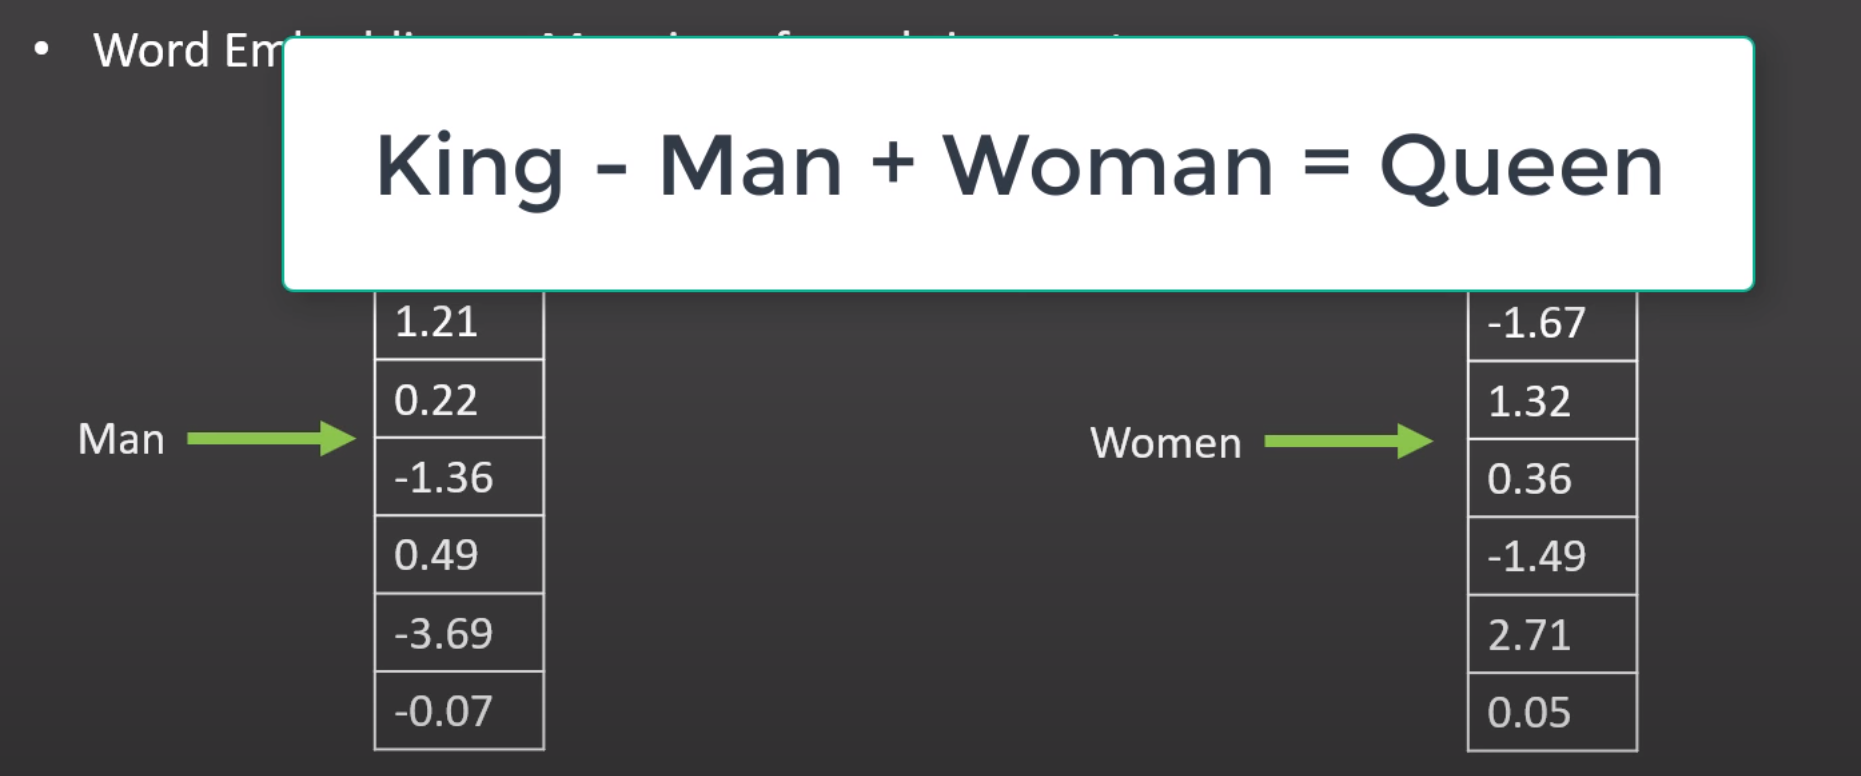

In [222]:
# %pip install gensim
from gensim.models import Word2Vec

def document_vector(model, doc):
    doc = [word for word in doc if word in word2vec_model.wv.index_to_key]
    if len(doc) > 0:
        return np.mean(model.wv[doc], axis=0)
    else:
        return np.zeros(model.vector_size)

# training Word2Vec model using word token
word2vec_model = Word2Vec(data['token'], vector_size=50, min_count=3) # default skip-gram

w2v_vec = np.array([document_vector(word2vec_model, doc) for doc in data['clean_text']])
w2v_vec

array([[ 0.03398791, -0.0234418 ,  0.03471237, ..., -0.28650999,
         0.25530937,  0.11953781],
       [ 0.03382989, -0.02426076,  0.03468079, ..., -0.28813726,
         0.25489703,  0.12017635],
       [ 0.0392395 , -0.02642103,  0.03783885, ..., -0.31625625,
         0.27737835,  0.13372751],
       ...,
       [ 0.0361635 , -0.0258459 ,  0.03550469, ..., -0.30609754,
         0.27006501,  0.12698886],
       [ 0.03362906, -0.0248358 ,  0.03447925, ..., -0.29062068,
         0.25690559,  0.12122998],
       [ 0.03399743, -0.02500875,  0.03481922, ..., -0.29035076,
         0.25724339,  0.12106926]])

# Problem 4

[LO1,LO2] [30%] Melakukan pemodelan klasifikasi berita dengan menggunakan 2 metode Machine 
Lerning, yaitu SVM dan Random Forest, anda perlu melakukan tuning parameter minimal 2 parameter 
untuk masing-masing algoritma machine learning.

In [243]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

def print_metrics(y_test, y_pred):
      print("accuracy:", accuracy_score(y_test, y_pred))
      print("f1 score:", f1_score(y_test, y_pred, average='macro'))
      print("precision score:", precision_score(y_test, y_pred, average='micro'))
      print("recall:",recall_score(y_test, y_pred, average='macro'))

## TF_IDF Representation

In [415]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(tfidf_matrix.toarray(),data_prc.iloc[:,3], test_size = 0.3, random_state = 39)

x_train

array([[0.        , 0.        , 0.        , ..., 0.05479521, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01857889, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Support Vector Machine Classifier

In [245]:
from sklearn.svm import SVC

svc_model = SVC(C=1, kernel='linear')
svc_model.fit(x_train, y_train)

svc_pred = svc_model.predict(x_test)

print(classification_report(y_test, svc_pred, zero_division=1))
print_metrics(y_test, svc_pred)

              precision    recall  f1-score   support

      bisnis       1.00      0.73      0.84        11
     hiburan       0.76      1.00      0.87        13
    olahraga       1.00      1.00      1.00        13
     politik       1.00      0.93      0.96        14

    accuracy                           0.92        51
   macro avg       0.94      0.91      0.92        51
weighted avg       0.94      0.92      0.92        51

accuracy: 0.9215686274509803
f1 score: 0.9179337231968812
precision score: 0.9215686274509803
recall: 0.9139610389610391


### Random Forest Classifier

In [416]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=20, max_depth=10)
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test, rf_pred, zero_division=1))
print_metrics(y_test, rf_pred)

              precision    recall  f1-score   support

      bisnis       1.00      0.73      0.84        11
     hiburan       0.72      1.00      0.84        13
    olahraga       1.00      1.00      1.00        13
     politik       1.00      0.86      0.92        14

    accuracy                           0.90        51
   macro avg       0.93      0.90      0.90        51
weighted avg       0.93      0.90      0.90        51

accuracy: 0.9019607843137255
f1 score: 0.9009729659135431
precision score: 0.9019607843137255
recall: 0.8961038961038962


## Word2Vec Representation

In [249]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(w2v_vec,data_prc.iloc[:,3], test_size = 0.3, random_state = 39)

x_train

array([[ 0.03462099, -0.02276484,  0.03369299, ..., -0.2863676 ,
         0.2519224 ,  0.11934026],
       [ 0.03606147, -0.02409033,  0.03585367, ..., -0.29719353,
         0.26162538,  0.12450351],
       [ 0.0354685 , -0.02548406,  0.03639099, ..., -0.30015999,
         0.26455808,  0.12401425],
       ...,
       [ 0.03526505, -0.02560443,  0.03583154, ..., -0.29746744,
         0.26318088,  0.12459318],
       [ 0.03242612, -0.02482229,  0.03393137, ..., -0.2828939 ,
         0.25213525,  0.11845364],
       [ 0.03168616, -0.02243982,  0.03204073, ..., -0.27202207,
         0.24272037,  0.1146265 ]])

### Support Vector Machine Classifier

In [417]:
from sklearn.svm import SVC

svc_model_w2v = SVC(C=0.5, kernel='linear')
svc_model_w2v.fit(x_train, y_train)

svc_pred_w2v = svc_model_w2v.predict(x_test)

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

print(classification_report(y_test, svc_pred_w2v, zero_division=1))
print_metrics(y_test, svc_pred_w2v)

              precision    recall  f1-score   support

      bisnis       1.00      0.55      0.71        11
     hiburan       0.57      1.00      0.72        13
    olahraga       1.00      1.00      1.00        13
     politik       1.00      0.64      0.78        14

    accuracy                           0.80        51
   macro avg       0.89      0.80      0.80        51
weighted avg       0.89      0.80      0.81        51

accuracy: 0.803921568627451
f1 score: 0.8026783177038931
precision score: 0.803921568627451
recall: 0.797077922077922


### Random Forest Classifier

In [418]:
from sklearn.ensemble import RandomForestClassifier

rf_model_w2v = RandomForestClassifier(n_estimators=50, max_depth=10)
rf_model_w2v.fit(x_train, y_train)

rf_pred_w2v = rf_model_w2v.predict(x_test)

print(classification_report(y_test, rf_pred_w2v, zero_division=1))
print_metrics(y_test, rf_pred_w2v)

              precision    recall  f1-score   support

      bisnis       0.89      0.73      0.80        11
     hiburan       0.91      0.77      0.83        13
    olahraga       1.00      1.00      1.00        13
     politik       0.72      0.93      0.81        14

    accuracy                           0.86        51
   macro avg       0.88      0.86      0.86        51
weighted avg       0.88      0.86      0.86        51

accuracy: 0.8627450980392157
f1 score: 0.8614583333333333
precision score: 0.8627450980392157
recall: 0.8562687312687314


# Problem 5

[LO3] [15%] Jelaskan analisa anda mengenai perbandingan performance test data dari model yang 
dibuat dengan metode text representation yang berbeda.

In [439]:
import pandas as pd

pd.DataFrame({
    'representation' : ['TF-IDF','TF-IDF', 'Word2Vec','Word2Vec'],
    'ML model' : ['SVM', 'RF', 'SVM', 'RF'],
    'hyperparameter' : ["C = 1, kernel = 'linear'", "n_estimators = 20, max_depth = 10", "C = 0.5, kernel = 'linear'", "n_estimators = 50, max_depth = 10"],
    'accuracy' : [accuracy_score(y_test, svc_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, svc_pred_w2v), accuracy_score(y_test, rf_pred_w2v)],
    'precision score' : [precision_score(y_test, svc_pred, average='macro'), precision_score(y_test, rf_pred, average='macro'), precision_score(y_test, svc_pred_w2v, average='macro'), precision_score(y_test, rf_pred_w2v, average='macro')],
    'recall' : [recall_score(y_test, svc_pred,average='macro'), recall_score(y_test, rf_pred,average='macro'), recall_score(y_test, svc_pred_w2v,average='macro'), recall_score(y_test, rf_pred_w2v,average='macro' )],
    'f1 score' : [f1_score(y_test, svc_pred,average='macro'), f1_score(y_test, rf_pred,average='macro'), f1_score(y_test, svc_pred_w2v,average='macro'), f1_score(y_test, rf_pred_w2v,average='macro')],
    })

,representation,ML model,hyperparameter,accuracy,precision score,recall,f1 score
0,TF-IDF,SVM,"C = 1, kernel = 'linear'",0.921569,0.941176,0.913961,0.917934
1,TF-IDF,RF,"n_estimators = 20, max_depth = 10",0.901961,0.930556,0.896104,0.900973
2,Word2Vec,SVM,"C = 0.5, kernel = 'linear'",0.803922,0.891304,0.797078,0.802678
3,Word2Vec,RF,"n_estimators = 50, max_depth = 10",0.862745,0.880051,0.856269,0.861458


1. **TF-IDF (SVM)**
    - **Hyperparameters**: C = 1, kernel = 'linear'
    - **Accuracy (92.16%)**: This metric shows the overall correctness of the model across all classes. An accuracy of 92.16% means that the SVM model correctly predicts the topics of the articles (politik, olahraga, hiburan, bisnis) 92.16% of the time when using TF-IDF representation.
    - **Precision Score (94.12%)**: Precision measures the accuracy of positive predictions. Specifically, when the model predicts a specific category, it is correct 94.12% of the time.
    - **Recall (91.40%)**: Recall measures the model's ability to find all relevant instances in a dataset. Here, it identifies 91.40% of all relevant articles correctly per category.
    - **F1 Score (91.79%)**: The F1 score indicating that the model is robust in terms of both precision and recall. 

2. **TF-IDF (RF)**
    - **Hyperparameters**: n_estimators = 20, max_depth = 10
    - **Accuracy (90.20%)**: This model accurately predicts the correct topic 90.20% of the time using TF-IDF. While slightly lower than the SVM model, it still indicates a high level of effectiveness.
    - **Precision Score (93.06%)**: The precision indicates that when the RF model predicts a category, it is correct about 93.06% of the time.
    - **Recall (89.61%)**: This model identifies 89.61% of all relevant articles correctly, suggesting slightly lower sensitivity compared to the SVM.
    - **F1 Score (90.10%)**: With a slightly lower F1 score than the SVM model, this RF model still shows a good balance between precision and recall but with a slight emphasis on precision.

3. **Word2Vec (SVC)**
    - **Hyperparameters**: C = 0.5, kernel = 'linear'
    - **Accuracy (80.39%)**: This is notably lower than the models using TF-IDF, suggesting that Word2Vec may not capture the nuances of the dataset as effectively for SVM or that the model parameters are not optimal.
    - **Precision Score (89.13%)**: High precision indicates that predictions made by the model are usually correct, but the lower accuracy and recall suggest that it misses a significant number of relevant cases.
    - **Recall (79.71%)**: This lower recall rate indicates the model is less capable of identifying all relevant instances, potentially missing out on relevant articles.
    - **F1 Score (80.27%)**: The F1 score is considerably lower, reflecting the imbalance and less effective performance in both precision and recall.
   
4. **Word2Vec (RF)**
    - **Hyperparameters**: n_estimators = 50, max_depth = 10
    - **Accuracy (86.27%)**: Shows an improvement over the SVM with Word2Vec but still below the TF-IDF models. This suggests some sensitivity to feature representation.
    - **Precision Score (88.01%)**: Indicates a high level of correctness in the predictions it makes, though slightly lower than its TF-IDF counterparts.
    - **Recall (85.63%)**: This recall is better than the SVM with Word2Vec but still lower than the TF-IDF models, indicating it does not catch as many true positives as the other configurations.
    - **F1 Score (86.15%)**: Shows a reasonable balance between precision and recall but indicates room for improvement, especially in tuning model parameters or considering different features.